# Import Relevant Modules

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# Load datasets

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

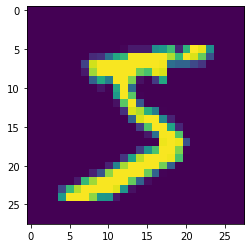

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Definition of functions for model creation, training and plotting of metrics

In [10]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [11]:
def create_model(lr):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    

In [12]:
def train_model(model, x, y, epochs, batch_size=None, validation_split=0.1):
  history = model.fit(x=x, y=y, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  
  return epochs, hist

# Usage of functions defined

In [13]:
lr = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
12/12 [==============================] - 3s 31ms/step - loss: 1.7114 - accuracy: 0.4665 - val_loss: 0.9798 - val_accuracy: 0.7872
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9106 - accuracy: 0.7338 - val_loss: 0.5544 - val_accuracy: 0.8645
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.6516 - accuracy: 0.8076 - val_loss: 0.4268 - val_accuracy: 0.8896
Epoch 4/50
12/12 [==============================] - 0s 10ms/step - loss: 0.5352 - accuracy: 0.8443 - val_loss: 0.3631 - val_accuracy: 0.9034
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4707 - accuracy: 0.8627 - val_loss: 0.3247 - val_accuracy: 0.9129
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.4328 - accuracy: 0.8753 - val_loss: 0.2995 - val_accuracy: 0.9184
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4001 - accuracy: 0.8836 - val_loss: 0.2793 - val_accuracy: 0.9232
Epoch 8/50
12

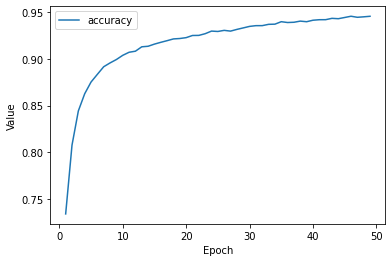

In [14]:
model = create_model(lr)
epochs, hist = train_model(model, x_train_normalized, y_train, epochs, batch_size, validation_split)

metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, metrics_to_plot)

In [15]:
model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

3/3 [==============================] - 0s 11ms/step - loss: 0.1415 - accuracy: 0.9582


[0.14149773120880127, 0.9581999778747559]

In [16]:
import cv2

In [17]:
image = cv2.imread("2_in_paint.png")

In [18]:
image

In [19]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

error: ignored

In [ ]:
img_gray

In [ ]:
img_gray = np.invert(img_gray)
img_gray = img_gray / 255.0

In [ ]:
model.predict(np.array([img_gray]))

In [ ]:
import base64
image = "iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACFSURBVEhL7dTBDYAgDAXQ4gSMwAiwAauw/xD4ExoTQ61JUz31XawUe/mNac5J3g5+uoqh/n4cOsbgSqJ3Qd7TlLT91bsQQfn7ZCghx911Xmtd11713tcnIA/NOa+rKPjoDi2uJMb/qb6qsVIWCLC1xi8bY1CgZBVB+bMPLaVwtbGn/4joBMtgiNEO+tdBAAAAAElFTkSuQmCC"
decoded = base64.b64decode(image)
np_data = np.fromstring(decoded, np.uint8)
img = cv2.imdecode(np_data, cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [ ]:
def test_model(image):
  decoded = base64.b64decode(image)
  np_data = np.fromstring(decoded, np.uint8)
  img = cv2.imdecode(np_data, cv2.IMREAD_UNCHANGED)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray = np.invert(img_gray)
  img_gray = img_gray / 255.0
  plt.imshow(img_gray)
  confidence = model.predict(np.array([img_gray])).tolist()[0]
  max_confidence = max(confidence)
  return confidence.index(max_confidence)

In [ ]:
image = "iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAIAAAD9b0jDAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAACFSURBVEhL7dTBDYAgDAXQ4gSMwAiwAauw/xD4ExoTQ61JUz31XawUe/mNac5J3g5+uoqh/n4cOsbgSqJ3Qd7TlLT91bsQQfn7ZCghx911Xmtd11713tcnIA/NOa+rKPjoDi2uJMb/qb6qsVIWCLC1xi8bY1CgZBVB+bMPLaVwtbGn/4joBMtgiNEO+tdBAAAAAElFTkSuQmCC"
prediction = test_model(image)
print(f"The model's prediction is: {prediction}")

In [ ]:
model.save('image_classification_model')

In [ ]:
!zip -r "./image_classification_model.zip" "./image_classification_model"

# Converting Models from Python to Javascript

In [ ]:
# Save in h5 format
model.save("image_classification_model.h5")

In [ ]:
# Install JS Converter
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 5.4 MB/s 
     |████████████████████████████████| 185 kB 14.9 MB/s 
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 145 kB 55.8 MB/s 
     |████████████████████████████████| 237 kB 75.5 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
!tensorflowjs_converter --input_format=keras image_classification_model.h5 image_classification_model_js

In [ ]:
!zip -r "./image_classification_model_js.zip" "./image_classification_model_js"

  adding: image_classification_model_js/ (stored 0%)
  adding: image_classification_model_js/model.json (deflated 70%)
  adding: image_classification_model_js/group1-shard1of1.bin (deflated 7%)
